In [2]:
from data import Imdb
from explainers import SageExplainer
from metrics import *
import sage
imdb = Imdb(n_features=10)

Trying to unpickle estimator LinearSVC from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator _SigmoidCalibration from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator CalibratedClassifierCV from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator CountVectorizer from version 1.4.1.post1 when using version 1.4.0. This might lead t

In [4]:
exp = SageExplainer(imdb)

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
exp.explainer.predict(imdb.X[0:1])

In [3]:

model = imdb.model  # It is only the calibrated classifier, it is not a pipeline
feature_names = imdb.vectorizer.get_feature_names_out()

nItems = 5  # max number of documents to process

In [4]:
# Extracting the features and the target values
x = imdb.X_vectorized.toarray()
y = imdb.y.to_numpy()

# The work will focus on the first {nItems} doucments
x = x[:nItems, :].copy()
y = y[:nItems].copy().astype(int)

In [5]:
imputer = sage.MarginalImputer(model, x)
# Supported loss: 'mse', 'cross entropy'
estimator = sage.PermutationEstimator(imputer, 'cross entropy')

# Calculate SAGE values
sage_values = estimator(x, y)

x.shape (5, 10) S.shape (5, 10)


  0%|          | 0/1 [00:00<?, ?it/s]

x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (512, 10)
x.shape (512, 10) S.shape (5

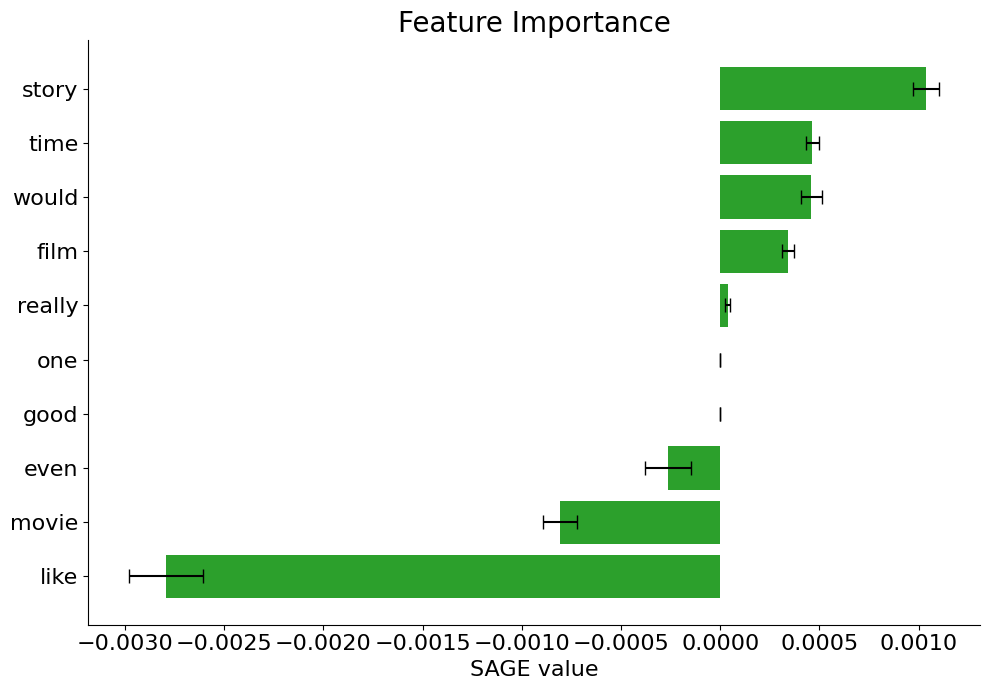

In [6]:
sage_values.plot(feature_names)